In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [24]:
df=pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [25]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [27]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [28]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [29]:
#Drop duplicate records
df.drop_duplicates(inplace = True)

#drop house rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis = 1, inplace=True, errors='ignore')

#Rename the price and service fee columns to include a dollar sign
df.rename(columns = {
  'price':'price_$',
  'service fee': 'service fee $'
}, inplace = True)

#Remove all dollar signs in the price and service fee columns
df['price_$' ] = df['price_$'].astype(str).str.replace('$','', regex= False)
df['service fee $'] = df['service fee $'].astype(str).str.replace('$','', regex= False)

#Remove all commas in the price and service fee columns
df['price_$' ] = df['price_$'].astype(str).str.replace(',','', regex= False)
df['service fee $'] = df['service fee $'].astype(str).str.replace(',','', regex= False)

#Drop all records with missing values
df.dropna(inplace = True)

#Change all mismatched data types to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service fee $' ] = df['service fee $'].astype(float)
df['id' ] = df['id' ].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

#Correct the Spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

#Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365']> 500].index)

In [30]:
df.duplicated().value_counts()

,count
False,83796


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

In [32]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service fee $,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83796.000000,83796.000000,83796.000000,83796.000000,83596.000000,83567.000000,83796.000000,83796.000000,83796,83796.000000,83796.000000,83796.000000,83796.000000
mean,40.727353,-73.948502,0.497721,2012.489522,626.342457,125.232436,7.436775,32.226622,2019-06-09 15:15:53.229271296,1.375596,3.278820,7.049907,141.759153
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721335,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056317,0.050338,0.499998,5.760523,331.809388,66.357813,28.122911,51.897899,NaN,1.749446,1.283724,29.568700,133.408285


In [33]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


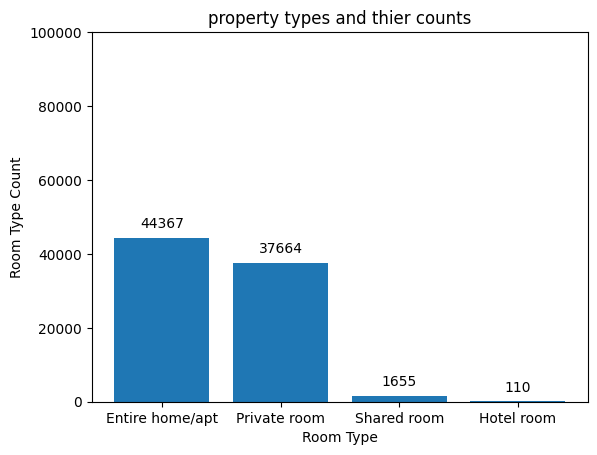

In [34]:
#room type count plotted on barchart
room_type_count=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_count,labels=property_types.loc[:,"count"],padding=5);
plt.ylim(0,100000);
plt.xlabel("Room Type");
plt.ylabel("Room Type Count");
plt.title("property types and thier counts");
plt.show();

In [35]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821


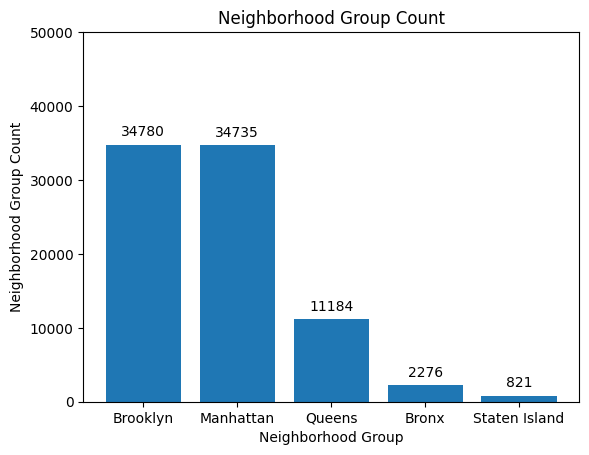

In [36]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim(0,50000);
plt.xlabel("Neighborhood Group");
plt.ylabel("Neighborhood Group Count");
plt.title("Neighborhood Group Count");
plt.show();

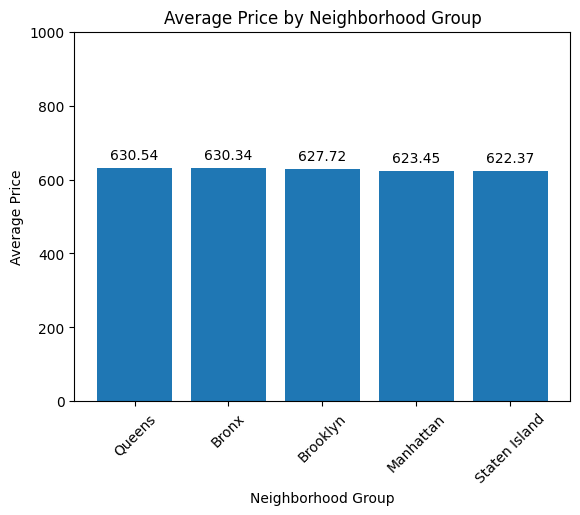

In [37]:
#which neighborhood group have the highest average prices for airbnb listing?
avg_price_group=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price_group.index,avg_price_group.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels=round(avg_price_group.loc[:,"price_$"],2),padding=4);
plt.ylim(0,1000);
plt.xlabel("Neighborhood Group");
plt.ylabel("Average Price");
plt.xticks(rotation=45);
plt.title("Average Price by Neighborhood Group");
plt.show();

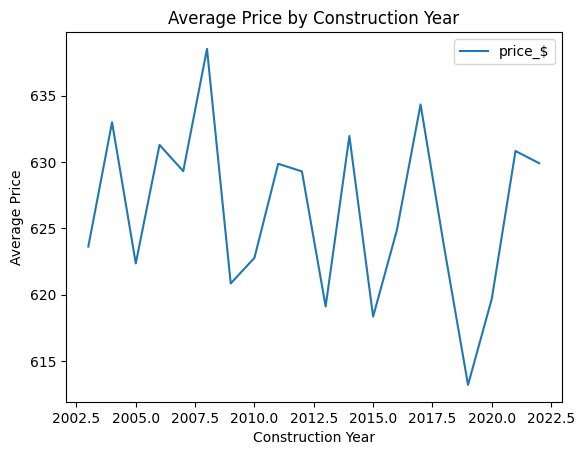

In [41]:
#is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel("Construction Year");
plt.ylabel("Average Price");
plt.title("Average Price by Construction Year");
plt.show();

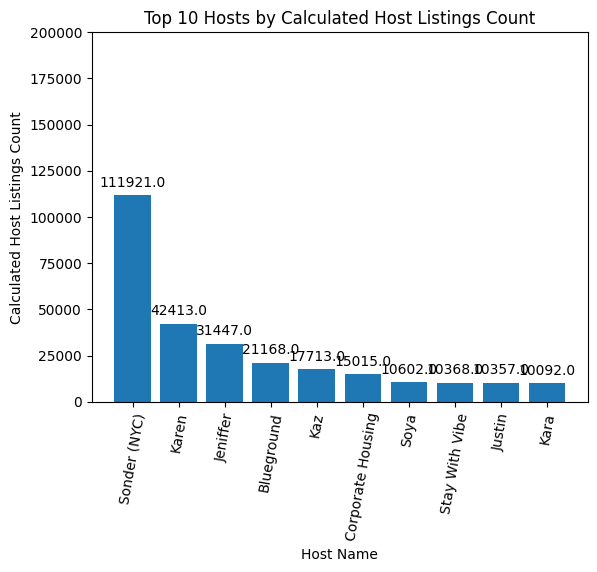

In [55]:
#who are the top 10 hosts by calculated host listing count?
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,labels=hosts.loc[:,"calculated host listings count"],label_type='edge',padding=4);
plt.ylim(0,200000);
plt.xlabel("Host Name");
plt.ylabel("Calculated Host Listings Count");
plt.xticks(rotation=80);
plt.title("Top 10 Hosts by Calculated Host Listings Count");
plt.show();


In [58]:
#are hosts with verified identities wore likely to receive positive review
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283856
unconfirmed,3.273786


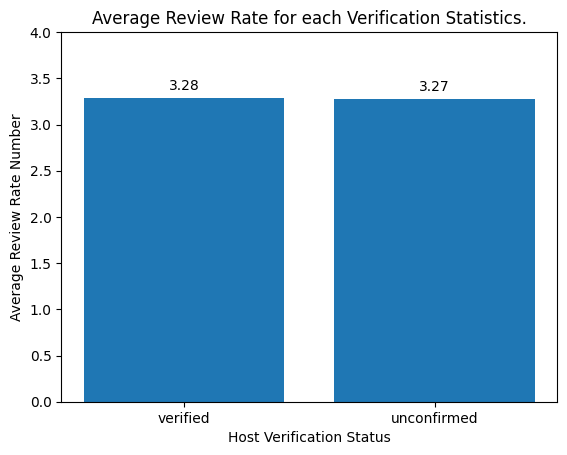

In [60]:
review_bar = plt.bar(review.index, review.loc[:, 'review rate number']);
plt.bar_label(review_bar, labels = round(review.loc[:, 'review rate number'], 2), padding = 4 );
plt.ylim([0, 4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

In [62]:
#Is there a correlation between the price of a listing and its service fee?

df['price_$'].corr(df['service fee $'])

np.float64(0.9999909082976475)

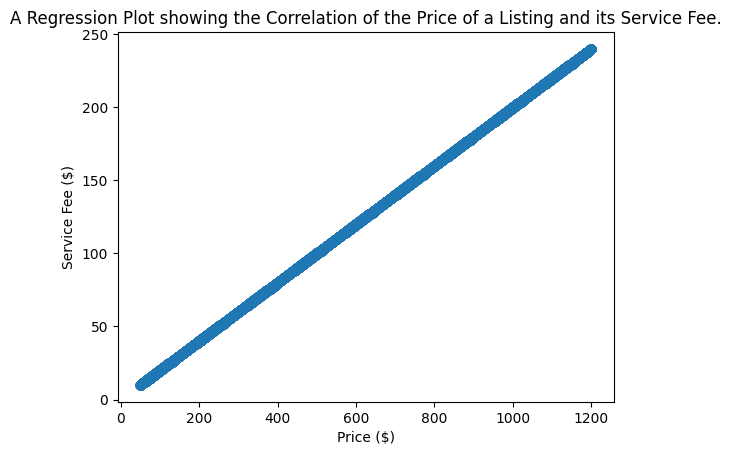

In [64]:
sns.regplot(df, x = 'price_$', y = 'service fee $');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [67]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274774
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285628
                    Shared room                3.252976
Queens              Entire home/apt            3.347437
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

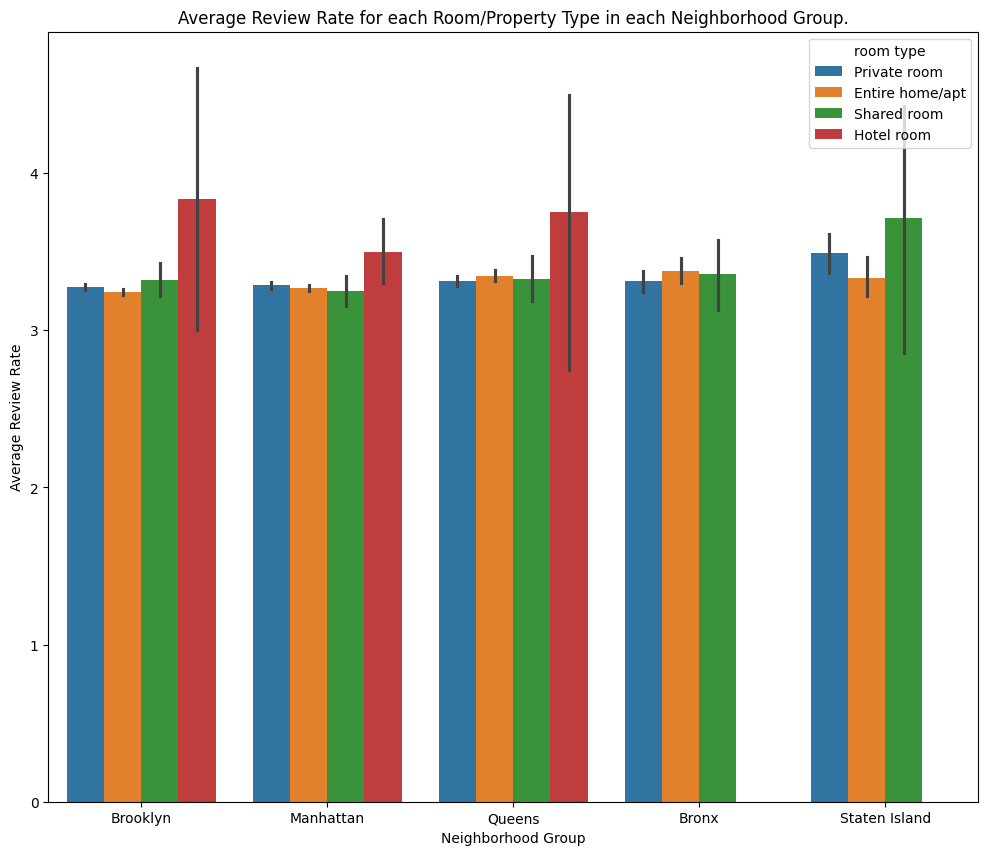

In [72]:
plt.figure(figsize = [12, 10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighborhood Group.');

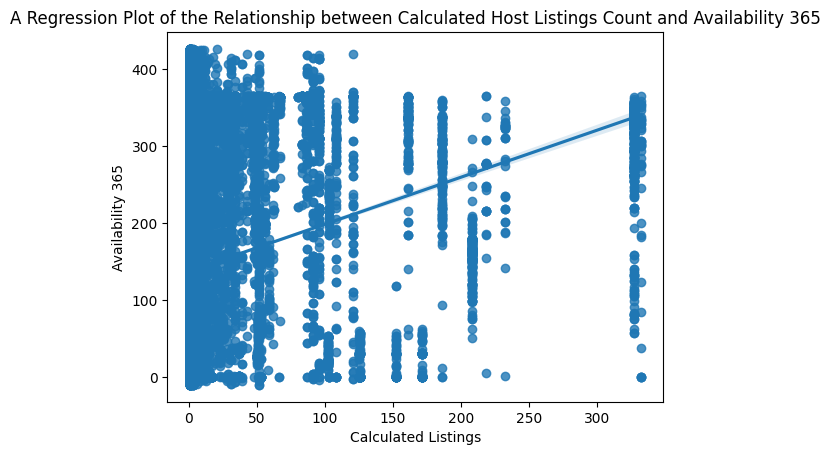

In [73]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [74]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1353372562905425)